### Name Entity From Capital Letter Words

In [3]:
#!pip install kneed

In [4]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

#### Capital Letter Word And Lower Letter Word

In [5]:
folder_name = "Spanish"

In [6]:
df = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Capital/Not_Apply_Lower_Word_Merge_Result.csv") # Not apply lower technique
df

,word,frequency
0,que,36599239
1,de,35537037
2,a,23731143
3,la,20963125
4,no,16614384
...,...,...
1220001,Stook,2
1220002,Cirros,2
1220003,Choochoolan,2
1220004,ahogable,2


In [7]:
df = df[df.iloc[:,1]>=5]
df

,word,frequency
0,que,36599239
1,de,35537037
2,a,23731143
3,la,20963125
4,no,16614384
...,...,...
687115,Gástalos,5
687116,facilísimas,5
687117,Propóngame,5
687118,desinvitándote,5


In [8]:
def word_length(var):
    var = str(var)
    if len(var) <= 15:
        return var
    else:
        return "word is bigger than adjust value"

In [9]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [10]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,que
1,de
2,a
3,la
4,no
...,...
681739,Gástalos
681740,facilísimas
681741,Propóngame
681742,desinvitándote


In [11]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [12]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,No
1,Qué
2,Y
3,Sí
4,Es
...,...
371563,Nodesde
371564,Bagiey
371565,Gástalos
371566,Propóngame


In [13]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,no
1,qué
2,y
3,sí
4,es
...,...
371563,nodesde
371564,bagiey
371565,gástalos
371566,propóngame


In [14]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,que
1,de
2,a
3,la
4,no
...,...
310171,reencontraba
310172,monoaminoxidasa
310173,enchufaremos
310174,facilísimas


In [15]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,que
1,de
2,a
3,la
4,no
...,...
310171,reencontraba
310172,monoaminoxidasa
310173,enchufaremos
310174,facilísimas


In [16]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [17]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [18]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set)) # compare capital letter word and lower letter word
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,makaloa
1,ikitsuki
2,rawa
3,jirafafeliz
4,conky
...,...
197705,shefi
197706,chandier
197707,laudeyrac
197708,badia


In [19]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [20]:
df_all_capital.to_excel("All_Time_Capital_Letter_Words.xlsx", sheet_name="Word", index=False)

#### Sentence First Word Analysis

In [21]:
df_sent = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Sentence/Merge/Sentence_Merge.csv") # Sentence Merge Result
df_sent

,sentence,frequency
0,sí,2307189
1,no,1761565
2,qué,902304
3,gracias,891171
4,hola,753994
...,...,...
11102883,las que conocemos,3
11102884,dos de ellos encajan,3
11102885,las revolucionarias geeta y babita contra el d...,3
11102886,cuando esto termine me saldré de todo esto,3


In [22]:
#df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [23]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i, re.UNICODE)
    first_words.append(words[0])

In [24]:
first_ser = pd.Series(first_words)
first_ser

0                sí
1                no
2               qué
3           gracias
4              hola
             ...   
11102883        las
11102884        dos
11102885        las
11102886     cuando
11102887       esta
Length: 11102888, dtype: object

In [25]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,no,778217
1,y,352718
2,es,268512
3,el,225180
4,pero,192739
...,...,...
213194,shantipriya,1
213195,hetch,1
213196,sharingan,1
213197,prevaleció,1


In [26]:
set_first = set(df_first.iloc[:,0])

In [27]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [28]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # Capital letter word and first sentence word
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,kokuryo
1,turlocks
2,windazol
3,melsh
4,doerin
...,...
122823,idre
122824,doad
122825,wyseck
122826,shefi


In [29]:
df_all_spec.to_excel("Special_Name_Exactly_Full.xlsx", sheet_name="Spec_Name", index=False)

#### Spec Name Knee Point

In [30]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # for frequency
df_word

,word,frequency
0,que,37853284
1,de,37809537
2,no,33043466
3,a,25439588
4,la,24024343
...,...,...
447790,despilfarrará,5
447791,shiply,5
447792,jeunesse,5
447793,autentificaste,5


In [31]:
df_all_spec_freq = pd.merge(df_word, df_all_spec, how="inner", on="word") # frequency value
df_all_spec_freq

,word,frequency
0,elanna,1500
1,tirith,1345
2,arryn,1288
3,drakul,1032
4,scarlata,1023
...,...,...
106462,jetwing,5
106463,shintogi,5
106464,autisticus,5
106465,shiok,5


In [32]:
total_freq_spec = df_all_spec_freq.iloc[:,1].sum()
total_freq_spec

2036010

In [33]:
df_all_spec_freq["ratio"] = round(((df_all_spec_freq.iloc[:,1]/total_freq_spec)*100),7)
df_all_spec_freq

,word,frequency,ratio
0,elanna,1500,0.073674
1,tirith,1345,0.066061
2,arryn,1288,0.063261
3,drakul,1032,0.050687
4,scarlata,1023,0.050245
...,...,...,...
106462,jetwing,5,0.000246
106463,shintogi,5,0.000246
106464,autisticus,5,0.000246
106465,shiok,5,0.000246


In [34]:
df_all_spec_freq["cumul_ratio"] = np.cumsum(df_all_spec_freq.iloc[:,2])
df_all_spec_freq

,word,frequency,ratio,cumul_ratio
0,elanna,1500,0.073674,0.073674
1,tirith,1345,0.066061,0.139734
2,arryn,1288,0.063261,0.202995
3,drakul,1032,0.050687,0.253682
4,scarlata,1023,0.050245,0.303928
...,...,...,...,...
106462,jetwing,5,0.000246,99.999310
106463,shintogi,5,0.000246,99.999556
106464,autisticus,5,0.000246,99.999802
106465,shiok,5,0.000246,100.000047


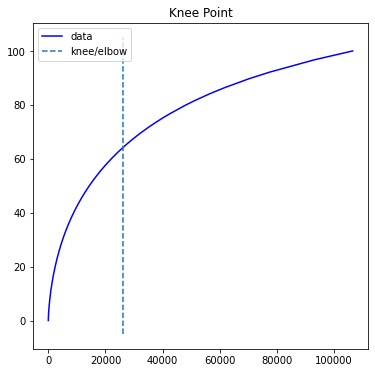

In [35]:
spec_kneedle = KneeLocator(x=df_all_spec_freq.cumul_ratio.index, y=df_all_spec_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
spec_kneedle.plot_knee()

In [36]:
print(round(spec_kneedle.knee_y))

64


In [37]:
knee_point_spec = round(spec_kneedle.knee_y)

In [38]:
df_spec_knee = df_all_spec_freq[df_all_spec_freq.cumul_ratio <= knee_point_spec]
df_spec_knee

,word,frequency,ratio,cumul_ratio
0,elanna,1500,0.073674,0.073674
1,tirith,1345,0.066061,0.139734
2,arryn,1288,0.063261,0.202995
3,drakul,1032,0.050687,0.253682
4,scarlata,1023,0.050245,0.303928
...,...,...,...,...
25897,taang,20,0.000982,63.995205
25898,kayapó,20,0.000982,63.996187
25899,masau,20,0.000982,63.997169
25900,ivdel,20,0.000982,63.998152


In [39]:
df_spec_knee.to_excel("Special_Name_Exactly_Knee.xlsx", sheet_name="Spec_Name", index=False)

#### First 100 000 Word And Spec Name Analysis

In [49]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # Word Merge Result
df_word = df_word.head(100000)
df_word

,word,frequency
0,que,37853284
1,de,37809537
2,no,33043466
3,a,25439588
4,la,24024343
...,...,...
99995,shaniqua,132
99996,praetorius,132
99997,kenge,132
99998,constitucion,132


In [50]:
set_word = set(df_word.iloc[:,0])

In [51]:
set_spec_knee = set(df_spec_knee.iloc[:,0])

In [52]:
df_word_spec = pd.DataFrame(set_word.intersection(set_spec_knee))
df_word_spec.rename(columns={0:"word"}, inplace=True)
df_word_spec

,word
0,rumsen
1,kord
2,wooten
3,unr
4,anor
...,...
1298,birdwell
1299,publishing
1300,bachmann
1301,wailers


In [44]:
df_word_spec.to_excel("Special_Name_In_Adjust_Word.xlsx", sheet_name="Spec_Name", index=False)